In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_df = pd.read_csv('data/test.csv')
train_df = pd.read_csv('data/train.csv')
gender_df = pd.read_csv('data/gender_submission.csv')

# Data evaluation (type and null quantity)

In [2]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## Conclusion
**Cabin** and **Age** columns have null rows

# Train dataset specific evaluation

In [5]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [7]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [8]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
a= train_df['Pclass'].value_counts()

<AxesSubplot:>

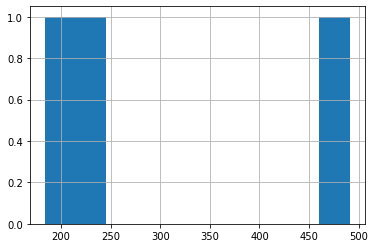

In [10]:
a.hist()

# Ideas
* Embarked, Cabin, Fare, Name, Ticket doesn't care
* Pclass, Sex, Age, SibSp, Parch maybe care

* Parch: Quantity of parents and children aboard
* SibSp: Quantity of sibling and spouses aboard
* Pclass: A proxy for socio-economic status (SES) -> 1st = Upper 2nd = Middle 3rd = Lower

# Data cleaning
Remove null data from train dataset.

In [11]:
train_df = train_df.dropna(subset=["Age"])

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [13]:
train_df = train_df.drop(columns=['Ticket', 'Fare', 'Embarked', 'Cabin'])

## Add surname feature to the dataset

In [14]:
train_df['Surname'] = train_df.Name.apply(lambda x: x.split(',')[0])

## Analyze data behaviour

In [21]:
classes = train_df['Pclass'].value_counts()
values = []
for item in classes.iteritems():
    values.append(int(item[1]))
y_source = [3, 1, 2]
x_source = values
y_source = np.array(y_source)
x_source = np.array(x_source)

Text(0, 0.5, 'Pclass')

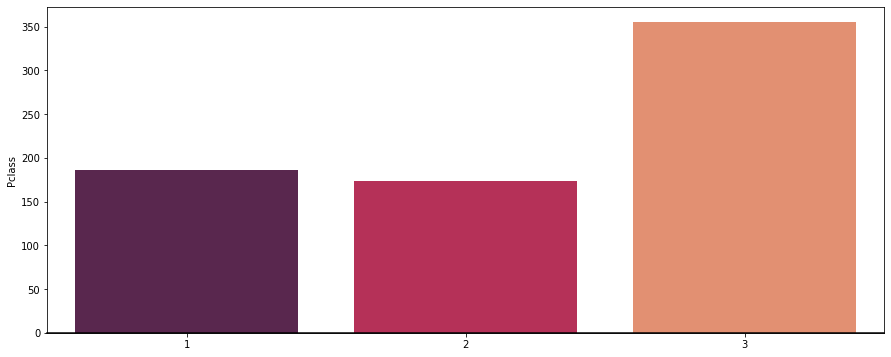

In [22]:
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=y_source, y=x_source, palette="rocket", ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_ylabel("Pclass")

In [23]:
survived_df = train_df[train_df['Survived'] == 1]

## Analyzing survival people
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

In [24]:
survived_df['Pclass'].value_counts()

1    122
3     85
2     83
Name: Pclass, dtype: int64

In [33]:
survived_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 889
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  290 non-null    int64  
 1   Survived     290 non-null    int64  
 2   Pclass       290 non-null    int64  
 3   Name         290 non-null    object 
 4   Sex          290 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        290 non-null    int64  
 7   Parch        290 non-null    int64  
 8   Surname      290 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 22.7+ KB


Most people that survived were from the upper class

In [28]:
print(f"{len(survived_df[survived_df['SibSp']>0])} out of {len(survived_df)} people had with Siblings or Spouses aboard and survived")

115 out of 290 people with Siblings or Spouses aboard survived


In [29]:
print(f"{len(survived_df[survived_df['Parch']>0])} out of {len(survived_df)} people had parents or children aboard and survived")

104 out of 290 people with parents or children aboard survived


In [34]:
print(f"{len(survived_df[(survived_df['Parch'] <= 0) & (survived_df['SibSp'] <= 0)])} out of {len(survived_df)} people were alone survived")

130 out of 290 people were alone survived


In [35]:
print(f"{len(survived_df[(survived_df['Parch'] > 0) & (survived_df['SibSp'] > 0)])} out of {len(survived_df)} had some relative aboard and survived")

59 out of 290 had some relative aboard and survived
